Let us calculate the gradient of a toy VQE simulation. The ansatz used is
$$\ket{\Psi} = R_{x}(\theta)\ket{0}, R_{x}(\theta) = e^{i\frac{\theta}{2}X},$$
and the Hamiltonian used is
$$H = Y.$$
Then the energy is given by
$$E(\theta) = \bra{\Psi(\theta)}H\ket{\Psi(\theta)} = \bra{0}R^{\dag}_{x}(\theta) Y R_{x}(\theta)\ket{0} = \mathrm{sin}\,\theta.$$
The derivative of it is
$$\frac{\partial{E}}{\partial{\theta}} = \frac{i}{2} (\bra{0}XR^{\dag}_{x}(\theta) Y R_{x}(\theta)\ket{0} - \bra{0}R^{\dag}_{x}(\theta) Y R_{x}(\theta) X\ket{0}) = \mathrm{cos}\,\theta.$$
To obtain the result in the computational basis, we need to apply a $HS^{\dag}$ gate in the circuit before the measurement
$$\bra{\Psi(\theta)}Y\ket{\Psi(\theta)} = \bra{\Psi(\theta)}SHZHS^{\dag}\ket{\Psi(\theta)}.$$

In [2]:
from qulacs import Observable, QuantumState, QuantumCircuit, ParametricQuantumCircuit
from qulacs.gate import S, Sdag, CNOT, CZ, H, RX, merge
from qulacsvis import circuit_drawer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_qubits = 2

observable = Observable(n_qubits)
observable.add_operator(1., "Z 0")

## Circuit of derivative $\partial{\langle Y \rangle}/\partial{\theta}$

In [4]:
def circuit_dev(theta):
    circuit = QuantumCircuit(n_qubits)
    
    circuit.add_H_gate(0)
    circuit.add_CNOT_gate(0, 1)
    circuit.add_gate(RX(1, theta))
    circuit.add_S_gate(1)
    circuit.add_H_gate(1)
    circuit.add_CZ_gate(0, 1)
    circuit.add_H_gate(1)
    circuit.add_Sdag_gate(1)
    circuit.add_Sdag_gate(0)
    circuit.add_H_gate(0)
    

    return circuit

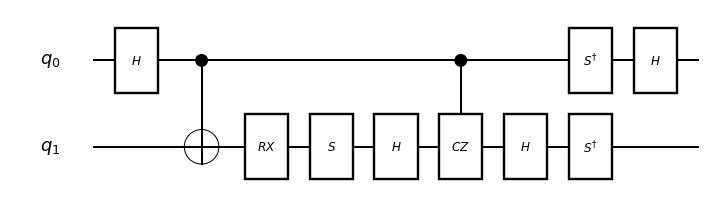

In [5]:
circuit_drawer(circuit_dev(np.pi), "mpl")

In [6]:
def res(theta):
    state = QuantumState(n_qubits)
    #state.set_zero_state()
    circuit_dev(theta).update_quantum_state(state)
    
    return observable.get_expectation_value(state)
    

In [7]:
theta_list = []
res_list = []

number = 51

for i in range(number):
    theta = i*2*np.pi/(number-1)
    exp = res(theta)

    theta_list.append(theta)
    res_list.append(exp)

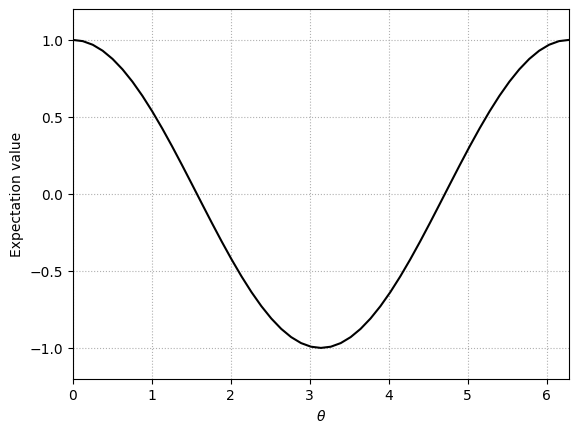

In [8]:
xmin_plot, xmax_plot = 0, 2*np.pi
ymin_plot, ymax_plot = -1.2, 1.2
plt.xlim(xmin_plot, xmax_plot)
plt.ylim(ymin_plot, ymax_plot)

plt.plot(theta_list, res_list, color="black", linestyle="solid")

plt.ylabel("Expectation value")
plt.xlabel("$\\theta$")
plt.grid(linestyle='dotted')
#plt.legend()
plt.show()

## Circuit for the expectation value of $H = Y$
The ansatz is defined as
$$\ket{\Psi} = R_{x}(\theta)\ket{0}.$$

In [9]:
n_qubits = 1

observable = Observable(n_qubits)
observable.add_operator(1., "Z 0")

In [10]:
def circuit_Y(theta):
    circuit = QuantumCircuit(n_qubits)
    
    circuit.add_gate(RX(0, theta))
    circuit.add_Sdag_gate(0)
    circuit.add_H_gate(0)

    return circuit

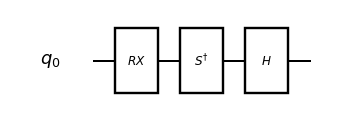

In [11]:
circuit_drawer(circuit_Y(np.pi), "mpl")

In [12]:
def res_Y(theta):
    state = QuantumState(n_qubits)
    circuit_Y(theta).update_quantum_state(state)
    
    return observable.get_expectation_value(state)

In [13]:
theta_list = []
res_Y_list = []

number = 51

for i in range(number):
    theta = i*2*np.pi/(number-1)
    exp = res_Y(theta)
    
    theta_list.append(theta)
    res_Y_list.append(exp)

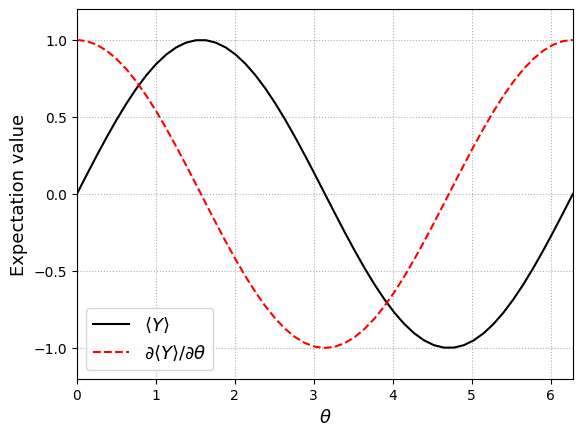

In [14]:
xmin_plot, xmax_plot = 0, 2*np.pi
ymin_plot, ymax_plot = -1.2, 1.2
plt.xlim(xmin_plot, xmax_plot)
plt.ylim(ymin_plot, ymax_plot)

plt.plot(theta_list, res_Y_list, color="black", linestyle="solid", label="$\\langle Y \\rangle$")
plt.plot(theta_list, res_list, color="red", linestyle="dashed", label="$\\partial{\\langle Y \\rangle}/\\partial{\\theta}$")

plt.ylabel("Expectation value", fontsize=13)
plt.xlabel("$\\theta$", fontsize=13)
plt.grid(linestyle='dotted')
plt.legend(loc="best", fontsize=13)
plt.show()

In [129]:
from qulacs.gate import to_matrix_gate
print(to_matrix_gate(RX(0, np.pi)))

 *** gate info *** 
 * gate name : DenseMatrix
 * target    : 
 0 : commute X     
 * control   : 
 * Pauli     : no
 * Clifford  : no
 * Gaussian  : no
 * Parametric: no
 * Diagonal  : no
 * Matrix
(6.12323e-17,0)           (0,1)
          (0,1) (6.12323e-17,0)



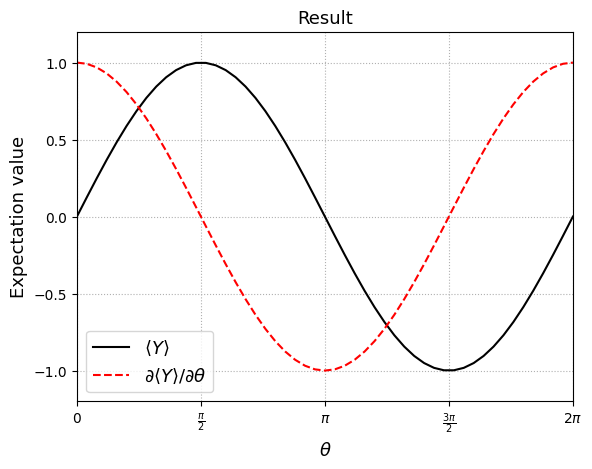

In [19]:
xmin_plot, xmax_plot = 0, 2*np.pi
ymin_plot, ymax_plot = -1.2, 1.2
plt.xlim(xmin_plot, xmax_plot)
plt.ylim(ymin_plot, ymax_plot)

plt.plot(theta_list, res_Y_list, color="black", linestyle="solid", label="$\\langle Y \\rangle$")
plt.plot(theta_list, res_list, color="red", linestyle="dashed", label="$\\partial{\\langle Y \\rangle}/\\partial{\\theta}$")

ax = plt.gca()
tick_l = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
xL=['0','$\\frac{\\pi}{2}$','$\\pi$','$\\frac{3\\pi}{2}$','$2\\pi$']
ax.set(xticks=tick_l)
ax.set_xticklabels(xL)

plt.title("Result", fontsize=13)
plt.ylabel("Expectation value", fontsize=13)
plt.xlabel("$\\theta$", fontsize=13)
plt.grid(linestyle='dotted')
plt.legend(loc="best", fontsize=13)
plt.show()